# Combining animation and interactivity

We can combine together the use of animation and interactive elements into the same plot as this example will demonstrate.
Start by importing the usual suspects and setting up the notebook:

In [1]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 120

We start by generating a static plot. Notice that we are explicitly setting the y limits.
This will avoid having to rescale the plot when the data changes.

<IPython.core.display.Javascript object>


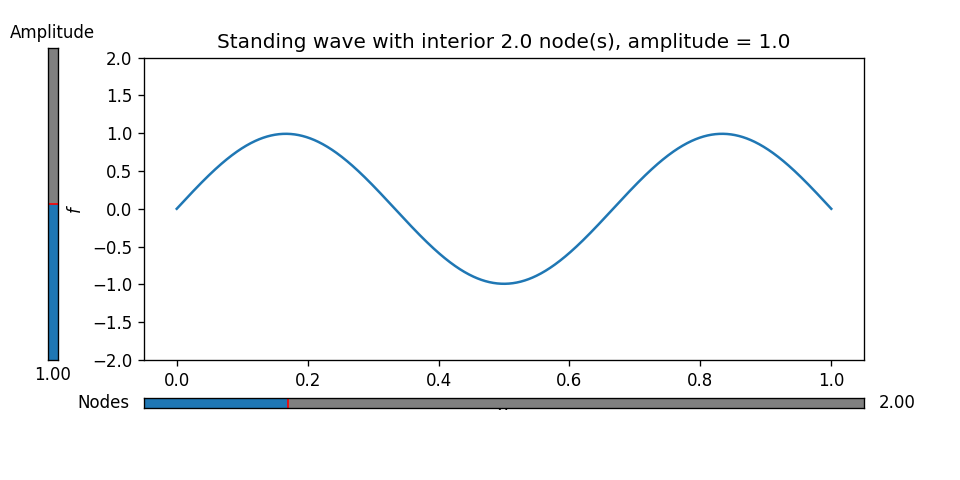

In [2]:
# Set parameters
amplitude = 1
nodes = 2

# Normal plot
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 1000)
y = amplitude*np.sin((nodes + 1)*np.pi*x)
sline, = ax.plot(x, y)

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.set_title(r"Standing wave with interior {} node(s), amplitude = {}".format(nodes, amplitude))
_ = ax.set_ylim(-2, 2) # Underscore supresses output here

We can add sliders as we did before.
In this case there is a vertical slider for the amplitude and a horizontal one to control the number of nodes.
To add these the plot has been adjusted accordingly.

In [3]:
# Adjust plot to make room and add sliders
fig.subplots_adjust(left=0.15, bottom=0.25)

axcolor = 'gray'

amp_ax = plt.axes([0.05, 0.25, 0.01, 0.65], facecolor=axcolor)
node_ax = plt.axes([0.15, 0.15, 0.75, 0.02], facecolor=axcolor)

amp_slider = Slider(amp_ax, 'Amplitude',
                    valmin=0, valmax=2,
                    valinit=amplitude, valstep=0.1,
                    orientation='vertical')
node_slider = Slider(node_ax, 'Nodes',
                    valmin=0, valmax=10,
                    valinit=nodes, valstep=1)

The update function now doubles as both the animation update, that changes the plot depending on the time step `t` and uses the current parameter from any of the sliders.

In [4]:
# Animation and slider update function
# This is called for each frame of the animation
# It also doubles as the slider update function
def update(t):
    amplitude = amp_slider.val
    nodes = node_slider.val
    ax.set_title(r"Standing wave with interior {} node(s), amplitude = {}".format(nodes, amplitude))
    x = np.linspace(0, 1, 1000)
    y = amplitude*np.cos(2*np.pi*t)*np.sin((nodes + 1)*np.pi*x)
    sline.set_data(x, y)
    return (sline, )

Since the update uses the slider value, there is no need to associate the sliders `on_changed` event with any function.
We only need to invoke the function animation class from matplotlib.

In [5]:
# Setup and display the animation
anim = FuncAnimation(fig,
                    update,
                    frames=np.linspace(0, 1, 100),
                    interval=10,
                    repeat=True,
                    blit=True)

plt.show()

It does not make sense in this instance to save the output as a video, since changing the parameters using sliders will change the animation.